In [1]:
#Importing all the neccessary libraries
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from nltk.stem.porter import PorterStemmer
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
#from gensim.models import Word2Vec, KeyedVectors
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from matplotlib.colors import ListedColormap
#import scikitplot.metrics as sciplot
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\life\AppData\Roaming\nltk_data...


True

In [ ]:
#### The immediate code block below does the following things :

1. Load the Amazon dataset.
2. Classify the reviews initially based on their score rating and give them a 'Positve' or a 'Negative' tag.
3. Remove duplicate/redundant datas.
4. Get an idea of how much percentage data were actually duplicates.
5. Plot a histogram which will display the distribution of the number of positive and negative reviews after de-duplication.

###### NOTE : If we dont' clean the data and feed them to an ML system, it basically means we are throwing in a lot of garbage data to the ML system. If we give it garbage, it will give us garbage back. So it's utmost important to clean the data before proceeding.

In [2]:
filtered_data=pd.read_csv("Reviews.csv")

In [3]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
filtered_data.shape

(568454, 10)

In [7]:
filtered_data = filtered_data.sample(frac=0.1, random_state=1)

In [8]:
filtered_data.shape

(22738, 10)

In [9]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
118958,118959,B000G1CG50,A10VDLEO35I25F,"ferrethouse ""ferrethouse""",0,0,5,1296345600,Treats even my cats want!,My dogs love these treats & my cats will follo...
386642,386643,B007SI3WAM,A5L3L318Q55FI,"Alfie's Pal ""Bichon Mom""",0,0,4,1307404800,Surprisingly Good Tea from Amazon,I was hesitant about ordering this the first t...
91496,91497,B000EF3E2W,A2HQ88XFHZM9OV,LibertyBelle,5,5,5,1235865600,Great Buy!,We have eaten this product for years and years...
85113,85114,B0055ZU898,A3MJ1A3RN6DMAE,"Michael J. Markowitz ""consumer""",0,0,5,1345161600,very good coffee,"If you're hooked on illy, as my wife and I are..."
143586,143587,B0007A0AQM,A332ZFX8S3A155,"vinb ""vin b""",5,7,5,1276300800,Great training treats!,My dog loves these! I've only tried the salmo...


In [10]:
#Give reviews with Score > 3 a 'Positive' tag, and reviews with a score < 3 a 'Negative' tag.
filtered_data['SentimentPolarity'] = filtered_data['Score'].apply(lambda x : 'Positive' if x > 3 else 'Negative')

In [11]:
filtered_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SentimentPolarity
118958,118959,B000G1CG50,A10VDLEO35I25F,"ferrethouse ""ferrethouse""",0,0,5,1296345600,Treats even my cats want!,My dogs love these treats & my cats will follo...,Positive
386642,386643,B007SI3WAM,A5L3L318Q55FI,"Alfie's Pal ""Bichon Mom""",0,0,4,1307404800,Surprisingly Good Tea from Amazon,I was hesitant about ordering this the first t...,Positive


In [12]:
filtered_data['SentimentPolarity'].value_counts()

SentimentPolarity
Positive    17759
Negative     4979
Name: count, dtype: int64

In [13]:

#score greater than 3 as postive  and equal to 3 as neutral and less than 3 as negative
#filtered_data['SentimentPolarity'] = filtered_data['Score'].apply(lambda x : 'Positive' if x > 3 else (if x < 3 else 'Neutral'))
#score greater than 3 as postive  and equal to 3 as neutral and less than 3 as negative and give more priority to negative words
#filtered_data['SentimentPolarity'] = filtered_data['Score'].apply(lambda x : 'Positive' if x > 3 else ('Negative' if x < 3 else 'Neutral'))
filtered_data['Class_Labels'] = filtered_data['SentimentPolarity'].apply(lambda x : 1 if x == 'Positive' else 0)

In [14]:
filtered_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SentimentPolarity,Class_Labels
118958,118959,B000G1CG50,A10VDLEO35I25F,"ferrethouse ""ferrethouse""",0,0,5,1296345600,Treats even my cats want!,My dogs love these treats & my cats will follo...,Positive,1
386642,386643,B007SI3WAM,A5L3L318Q55FI,"Alfie's Pal ""Bichon Mom""",0,0,4,1307404800,Surprisingly Good Tea from Amazon,I was hesitant about ordering this the first t...,Positive,1


In [15]:
filtered_data.shape

(22738, 12)

In [16]:
print("The number of positive and negative reviews before the removal of duplicate data.")
print(filtered_data["SentimentPolarity"].value_counts())

The number of positive and negative reviews before the removal of duplicate data.
SentimentPolarity
Positive    17759
Negative     4979
Name: count, dtype: int64


In [17]:
#Removing duplicate entries based on past knowledge.
filtered_duplicates=filtered_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=True)

In [18]:
print("The number of positive and negative reviews after the removal of duplicate data.")
print(filtered_data["SentimentPolarity"].value_counts())

The number of positive and negative reviews after the removal of duplicate data.
SentimentPolarity
Positive    17099
Negative     4793
Name: count, dtype: int64


In [19]:
#Removing the entries where HelpfulnessNumerator > HelpfulnessDenominator.
final_data=filtered_data[filtered_data.HelpfulnessNumerator <= filtered_data.HelpfulnessDenominator]

In [20]:
final_data["SentimentPolarity"].value_counts()

SentimentPolarity
Positive    17099
Negative     4793
Name: count, dtype: int64

In [ ]:
#### In this code block :

1. I am creating a copy of the final_data dataset called 'sampled_dataset' by dropping the unwanted columns that we don't need for this problem.
2. Sorting the data according to time, such that the oldest reviews are displayed at the top and the latest reviews are displayed at the bottom.
3. Displaying information about the number of postive and negative reviews in the sampled dataset, using a Histogram.

#Dropping unwanted columns for now.
sampled_dataset=final_data.drop(labels=['Id','ProductId', 'UserId', 'Score', 'ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Summary'], axis=1)
print("The shape of the sampled dataset after dropping unwanted columns : ", sampled_dataset.shape)
sampled_dataset.head()

In [22]:
#Dropping unwanted columns for now.
sampled_dataset=final_data.drop(labels=['Id','ProductId', 'UserId', 'Score', 'ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Summary'], axis=1)
print("The shape of the sampled dataset after dropping unwanted columns : ", sampled_dataset.shape)
sampled_dataset.head()

The shape of the sampled dataset after dropping unwanted columns :  (21892, 4)


,Time,Text,SentimentPolarity,Class_Labels
118958,1296345600,My dogs love these treats & my cats will follo...,Positive,1
386642,1307404800,I was hesitant about ordering this the first t...,Positive,1
91496,1235865600,We have eaten this product for years and years...,Positive,1
85113,1345161600,"If you're hooked on illy, as my wife and I are...",Positive,1
143586,1276300800,My dog loves these! I've only tried the salmo...,Positive,1


In [23]:
#Sorting data according to Time in ascending order => Time Based Splitting Step 1.
sampled_dataset=sampled_dataset.sort_values('Time', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [24]:
#Sorting data according to Time in ascending order => Time Based Splitting Step 1.
sampled_dataset=sampled_dataset.sort_values('Time', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [25]:
sampled_dataset = sampled_dataset.reset_index()

In [26]:

sampled_dataset.head(2)

,index,Time,Text,SentimentPolarity,Class_Labels
0,193974,1351209600,This stuff is great for my non-black tea drink...,Positive,1
1,467555,1351209600,I have used Alessi Decaffenated Caffe'Expresso...,Positive,1


In [27]:
sampled_dataset=sampled_dataset.drop(labels=['index'], axis=1)

<Axes: title={'center': 'Distribution Of Positive and Negative reviews after De-Duplication.'}, xlabel='SentimentPolarity'>

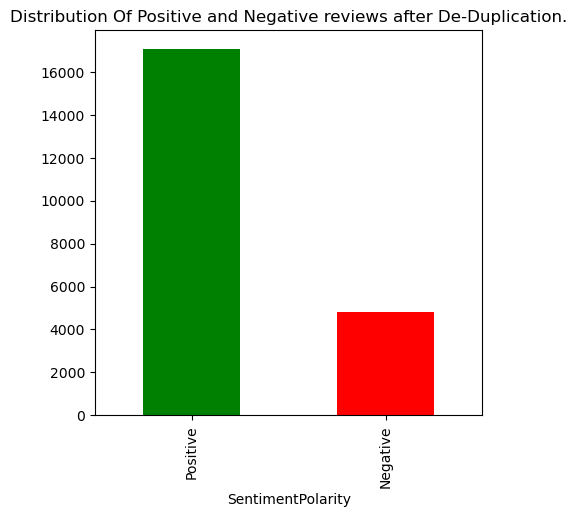

In [28]:
#Display distribution of Postive and Negative reviews in a bar graph
sampled_dataset["SentimentPolarity"].value_counts().plot(kind='bar',color=['green','red'],title='Distribution Of Positive and Negative reviews after De-Duplication.',figsize=(5,5))

In [ ]:
#### In this code block :

1. We define two functions which will remove the HTML tags and punctuations from each review.
2. At the end of this code block, each review will contain texts which will only contain alphabetical strings. 
3. We will apply techniques such as stemming and stopwords removal.
3. We will create two columns in the sampled dataset - 'CleanedText' and 'RemovedHTML'.
4. 'CleanedText' column will basically contain the data corpus after stemming the each reviews and removing stopwords from each review. We will use this for our Bag of Word model.
5. 'RemovedHTML' column will contain the data corpus from which only the HTML tags and punctuations are removed. We will use this column for our TF-IDF model, Average Word2Vec model and TF-IDF weighted average Word2Vec model.
6. Store the final table in a dataset called 'sampled_dataset' for future use.

In [29]:
import re


review = "i am satisfied with the product , and the service is good... @  ! 7 % $ and the delivery is on time <br /> <br /> overall i am happy with the product.product"


'''Data Cleaning Stage. Clean each review from the sampled Amazon Dataset.'''
#Data Cleaning Stage. Clean each review from the sampled Amazon Dataset

#Function to clean html tags from a sentence
def removeHtml(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text


In [30]:
cleaned_review=removeHtml(review)
print("The review after removing html tags : ",cleaned_review)

The review after removing html tags :  i am satisfied with the product , and the service is good... @  ! 7 % $ and the delivery is on time     overall i am happy with the product.product


In [31]:
#Function to keep only words containing letters A-Z and a-z. This will remove all punctuations, special characters etc.
def removePunctuations(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return cleaned_text

In [32]:
cleaned_review_only_text = removePunctuations(cleaned_review)
print("The review after removing  Punctuations : ",cleaned_review_only_text)

The review after removing  Punctuations :  i am satisfied with the product   and the service is good               and the delivery is on time     overall i am happy with the product product


In [33]:
# ineed to strip the text data and convert it into lower case
#Function to convert the entire sentence to lower case and strip the extra spaces.  
def stripLower(sentence):
    cleaned_text = sentence.lower().strip()
    cleaned_text = re.sub(' +', ' ', cleaned_text)
    return cleaned_text

In [34]:
final_cleaned_review = stripLower(cleaned_review_only_text)
print("The review after converting to lower case and stripping extra spaces : ",final_cleaned_review)

The review after converting to lower case and stripping extra spaces :  i am satisfied with the product and the service is good and the delivery is on time overall i am happy with the product product


In [35]:
final_cleaned_review

'i am satisfied with the product and the service is good and the delivery is on time overall i am happy with the product product'

In [36]:
def take_only_distinct_words(sentence):
    word_tokens = sentence.split()
    #print("The word tokens are : ", word_tokens)
    seen = set()
    cleaned_text = []
    for word in word_tokens:
        if word not in seen:
            cleaned_text.append(word)
            seen.add(word)
    #print("The distinct words are : ", cleaned_text)
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

cleaned_review_distinct_words = take_only_distinct_words(final_cleaned_review)
print("The review after taking only distinct words : ", cleaned_review_distinct_words)

The review after taking only distinct words :  i am satisfied with the product and service is good delivery on time overall happy


In [37]:
import nltk   #spacy
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\life\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [38]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [39]:
# my next step is to remove stop words from the text data
#Function to remove stop words from a sentence  
nltk.download('stopwords')
def removeStopWords(sentence):
    stop_words = set(stopwords.words('english'))
    # need to take all negative words from the stop words in list after that we will remove those words from the stop words
    #print("The stop words are : ", stop_words)
    negative_words = ["not", "no", "nor", "never", "don't", "didn't", "doesn't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't", "won't", "haven't", "hasn't", "hadn't", "mightn't", "mustn't", "shan't"]
    #print("The negative words are : ", negative_words)
    stop_words = stop_words - set(negative_words)
    word_tokens = sentence.split()
    cleaned_text = [word for word in word_tokens if not word in stop_words]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\life\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
rev_after_stopwords = removeStopWords(cleaned_review_distinct_words)

In [41]:
#example_review_for_stemming = "i am satisfied with the product and the service is good and satisfy overall the satisfaction is good"
rev_test = "satisfy  satisfied  satisfied satisfaction satisfactory satisfyingly"
# next step is to use stemming or  lemmatisation on the text data:
from nltk.stem.porter import PorterStemmer
def stemming(sentence):
    porter_stemmer = PorterStemmer()
    word_tokens = sentence.split()
    cleaned_text = [porter_stemmer.stem(word) for word in word_tokens]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

In [42]:
review_after_stemming = stemming(rev_test)
print("The review after stemming : ",review_after_stemming)

The review after stemming :  satisfi satisfi satisfi satisfact satisfactori satisfyingli


In [43]:
# create a function to use the stemming technique with snowball stemmer
def stemming_with_snowball(sentence):
    from nltk.stem.snowball import SnowballStemmer
    snowball_stemmer = SnowballStemmer(language='english')
    word_tokens = sentence.split()
    cleaned_text = [snowball_stemmer.stem(word) for word in word_tokens]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

In [44]:
review_after_snowball_stemming = stemming_with_snowball(rev_test)
print("The review after snowball stemmer : ",review_after_snowball_stemming)

The review after snowball stemmer :  satisfi satisfi satisfi satisfact satisfactori satisfi


Stemming Vs Lemmatisation Explanation:
Stemming and lemmatization are both techniques used in natural language processing (NLP) to reduce words to their base or root form, but they do so in different ways and with different levels of accuracy.
Stemming:
Stemming is a crude heuristic process that chops off the ends of words in the hope of achieving the correct base form of the word. It often involves removing common prefixes or suffixes. Stemming algorithms, such as the Porter Stemmer or Snowball Stemmer, use simple rules to perform this task.
Lemmatisation:
Lemmatisation, on the other hand, is a more sophisticated process that considers the context and the morphological analysis of words. It involves using a vocabulary and morphological analysis of words to return the base or dictionary form of a word, known as the lemma. Lemmatisation takes into account the part of speech and the meaning of the word, which often results in more accurate base forms. For example, the lemma of "better" is "good," and the lemma of "running" is "run."
Lemmatisation typically requires more computational resources and is slower than stemming due to its complexity and reliance on linguistic knowledge.


Stemming is faster and more efficient, while lemmatization is more accurate and context-aware. The choice between the two depends on the specific requirements of the NLP task at hand.

In [45]:
def lemmatization(sentence):
    lemmatizer = WordNetLemmatizer()
    word_tokens = sentence.split()
    cleaned_text = [lemmatizer.lemmatize(word) for word in word_tokens]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

review_after_lemmatization = lemmatization(rev_test)
print("The review after lemmatization : ",review_after_lemmatization)

The review after lemmatization :  satisfy satisfied satisfied satisfaction satisfactory satisfyingly


In [46]:
sampled_dataset.head(2)

,Time,Text,SentimentPolarity,Class_Labels
0,1351209600,This stuff is great for my non-black tea drink...,Positive,1
1,1351209600,I have used Alessi Decaffenated Caffe'Expresso...,Positive,1


In [47]:
def data_preprocessing(sentence):
    sentence = removeHtml(sentence)
    sentence = removePunctuations(sentence)
    sentence = stripLower(sentence)
    sentence = take_only_distinct_words(sentence)
    sentence = removeStopWords(sentence)
    sentence = stemming(sentence)
    return sentence
# we will call this function for each and every review in our dataset
sampled_dataset['Cleaned_Text'] = sampled_dataset['Text'].apply(data_preprocessing)

In [48]:
sampled_dataset.head(2)

,Time,Text,SentimentPolarity,Class_Labels,Cleaned_Text
0,1351209600,This stuff is great for my non-black tea drink...,Positive,1,stuff great non black tea drink friend nice ba...
1,1351209600,I have used Alessi Decaffenated Caffe'Expresso...,Positive,1,use alessi decaffen caff expresso year sometim...


In [49]:
sampled_dataset = sampled_dataset[['Time','Cleaned_Text','Class_Labels']]

In [50]:
print(sampled_dataset.shape)
sampled_dataset.head()

(21892, 3)


,Time,Cleaned_Text,Class_Labels
0,1351209600,stuff great non black tea drink friend nice ba...,1
1,1351209600,use alessi decaffen caff expresso year sometim...,1
2,1351209600,purchas item review highli anoth web site disa...,1
3,1351209600,bought eden brand find tast better recommend g...,1
4,1351209600,go lot garlic oliv oil use mani savori dish hu...,1


In [51]:
sampled_dataset['Class_Labels'].value_counts()

Class_Labels
1    17099
0     4793
Name: count, dtype: int64

In [52]:
#Split the data set into train and test sets. The test set should be unseen. Time Based Splitting Step 2.
#The top old 80% data will get into the train set. The latest 20% data will get into the test set.
def splitting_data(data):
    X = data['Cleaned_Text']
    y = data['Class_Labels']
    return X,y

In [53]:
X,y = splitting_data(sampled_dataset)

In [54]:
X

0        stuff great non black tea drink friend nice ba...
1        use alessi decaffen caff expresso year sometim...
2        purchas item review highli anoth web site disa...
3        bought eden brand find tast better recommend g...
4        go lot garlic oliv oil use mani savori dish hu...
                               ...                        
21887    usual purchas item smaller link pound stash fr...
21888    beauti repackag camper van beethoven first thr...
21889    beetlejuic stori ghost alec baldwin geena davi...
21890    michael keaton alreadi way major star play gho...
21891    happen say name three time michael keaten star...
Name: Cleaned_Text, Length: 21892, dtype: object

In [55]:
y

0        1
1        1
2        1
3        1
4        1
        ..
21887    1
21888    1
21889    1
21890    1
21891    1
Name: Class_Labels, Length: 21892, dtype: int64

In [56]:
# taking first 80% data as train data and last 20% data as test data
split = math.floor(0.8*len(X))
print("The split value is : ", split)
X_train = X[0:split,] ; y_train = y[0:split,]

X_test = X[split:,] ; y_test = y[split:,]

The split value is :  17513


In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17513,)
(4379,)
(17513,)
(4379,)


In [58]:
X_train

0        stuff great non black tea drink friend nice ba...
1        use alessi decaffen caff expresso year sometim...
2        purchas item review highli anoth web site disa...
3        bought eden brand find tast better recommend g...
4        go lot garlic oliv oil use mani savori dish hu...
                               ...                        
17508    well super mix high qualiti dog food ye cost j...
17509    product great howev local supermarket carri co...
17510    okay box x box equal serv total ounc buy produ...
17511    plan use everyth even picki roommat never eat ...
17512    year old eat soup sinc absolut love organ heal...
Name: Cleaned_Text, Length: 17513, dtype: object

In [60]:
X_test

17513    normal mix rub pretti happi result came across...
17514    not usual one flavor coffe save wonder hazelnu...
17515    need pickl pork hock decid heck order sampler ...
17516    vitamuffin absolut yummi first bought alreadi ...
17517    warn even make food licens anoth compani look ...
                               ...                        
21887    usual purchas item smaller link pound stash fr...
21888    beauti repackag camper van beethoven first thr...
21889    beetlejuic stori ghost alec baldwin geena davi...
21890    michael keaton alreadi way major star play gho...
21891    happen say name three time michael keaten star...
Name: Cleaned_Text, Length: 4379, dtype: object

In [61]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
17508    1
17509    1
17510    0
17511    1
17512    1
Name: Class_Labels, Length: 17513, dtype: int64

In [62]:
y_test

17513    1
17514    1
17515    1
17516    1
17517    0
        ..
21887    1
21888    1
21889    1
21890    1
21891    1
Name: Class_Labels, Length: 4379, dtype: int64

Normalisation vs Standaridation
Label Encoder vs One Hot Encoder

In [63]:
# need to calculate the total uniwue words in the text data of X_train data
def total_unique_words(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    unique_words = vectorizer.get_feature_names_out()
    return unique_words, len(unique_words)

In [64]:
# Calculate total unique words in X_train
unique_words, num_unique_words = total_unique_words(X_train)
print("Total unique words:", num_unique_words)
print("Sample unique words:", unique_words[:20])

Total unique words: 17399
Sample unique words: ['aa' 'aaaaaahhhhh' 'aaahhh' 'aacur' 'aafco' 'aah' 'aakaufman' 'aar' 'ab'
 'aback' 'abalon' 'abandon' 'abash' 'abbazabba' 'abbey' 'abbott' 'abc'
 'abd' 'abdi' 'abdomin']


# we need to convert text data into numerical data
# we will use bag of words or tfidf vectorizer to convert text data into numerical data
# bag of words VS TF-IDF
# we will use tfidf vectorizer to convert text data into numerical data

BOW and TF-IDF Explanation:
Bag of Words (BoW) 
and Term Frequency-Inverse Document Frequency (TF-IDF)

With example by taking few sentences as below:
sentence1 = "I love programming in Python"
sentence2 = "Python is a great programming language"
sentence3 = "I enjoy solving problems with Python"

BOW Formulation:
1. Create a vocabulary of unique words from all sentences.
vocabulary = ["I", "love", "programming", "in", "Python", "is", "a", "great", "language", "enjoy", "solving", "problems", "with"]
len(vocabulary) = 13
2. Represent each sentence as a vector based on the frequency of words in the vocabulary.
maintain the count of each word in one dictionary to see the count of each and every words
words_count = {
    "I": 2,
    "love": 1,
    "programming": 2,
    "in": 1,
     "Python": 3,
    "is": 1,
    "a": 1,
    "great": 1,
    "language": 1,
    "enjoy": 1,
    "solving": 1,
    "problems": 1,
    "with": 1
}
# Example BOW vectors
sentence1 = "I love programming in Python"
sentence1_vector = [2, 1, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
TF-IDF Formulation:
1. Calculate Term Frequency (TF) for each word in a sentence.  
TF(word) = (Number of times word appears in a sentence) / (Total number of words in the sentence)
TF("Python", sentence1) = 1/5 = 0.2
TF("programming", sentence1) = 1/5 = 0.2
TF("I", sentence1) = 1/5 = 0.2
TF("love", sentence1) = 1/5 = 0.2

In [65]:
#Create a function to convert text data into numerical data using Bag of words and need to save that count vetorizer object in pickle file for test data conversion
def text_to_bow(corpus):
    cv_object = CountVectorizer()
    X_bow = cv_object.fit_transform(corpus)
    # we need to save this cv_object in pickle file for test data conversion
    # saving the count vectorizer object in pickle file
    with open('count_vectorizer.pkl', 'wb') as f:
        pickle.dump(cv_object, f)
    return X_bow, cv_object


X_bow , cv_object = text_to_bow(X_train)

In [66]:
X_bow_array = X_bow.toarray()

In [67]:
X_bow.shape

(17513, 17399)

In [68]:
X_train

0        stuff great non black tea drink friend nice ba...
1        use alessi decaffen caff expresso year sometim...
2        purchas item review highli anoth web site disa...
3        bought eden brand find tast better recommend g...
4        go lot garlic oliv oil use mani savori dish hu...
                               ...                        
17508    well super mix high qualiti dog food ye cost j...
17509    product great howev local supermarket carri co...
17510    okay box x box equal serv total ounc buy produ...
17511    plan use everyth even picki roommat never eat ...
17512    year old eat soup sinc absolut love organ heal...
Name: Cleaned_Text, Length: 17513, dtype: object

In [69]:
model = MultinomialNB()

In [70]:
# Train the model using the training sets
model.fit(X_bow,y_train)

MultinomialNB()

In [71]:
#Predict the response for test dataset
y_train_pred = model.predict(X_bow)

In [72]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.8967624050705191


In [73]:
# confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", cm)
# we need to convert the X_test data into numerical data using the count vectorizer object which

Confusion Matrix:
 [[ 2745  1271]
 [  537 12960]]


In [74]:
# classification report
from sklearn.metrics import classification_report
print("Classification Report on train data:\n", classification_report(y_train, y_train_pred))

Classification Report on train data:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75      4016
           1       0.91      0.96      0.93     13497

    accuracy                           0.90     17513
   macro avg       0.87      0.82      0.84     17513
weighted avg       0.89      0.90      0.89     17513



In [75]:
# we need to convert the text data into numerical data by using saved count vectorizer object
# loading the count vectorizer object from pickle file
#Create a function to convert text data into numerical data using Bag of words for test data conversion
def text_to_bow_test(corpus):
    with open('count_vectorizer.pkl', 'rb') as f:
        loaded_cv_object = pickle.load(f)
    X_bow = loaded_cv_object.transform(corpus)
    return X_bow

X_test_bow = text_to_bow_test(X_test)

In [76]:
y_test_pred = model.predict(X_test_bow)

In [77]:
# classiffication report
print("Classification Report on test data:\n", classification_report(y_test, y_test_pred))

Classification Report on test data:
               precision    recall  f1-score   support

           0       0.70      0.47      0.56       777
           1       0.89      0.96      0.92      3602

    accuracy                           0.87      4379
   macro avg       0.79      0.71      0.74      4379
weighted avg       0.86      0.87      0.86      4379



In [78]:
# now we need to try with decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_bow, y_train)

DecisionTreeClassifier()

In [79]:
y_train_pred_dt = dt_model.predict(X_bow)
y_test_pred_dt = dt_model.predict(X_test_bow)
print("Classification Report on train data using Decision Tree Classifier:\n", classification_report(y_train,y_train_pred_dt))
print("Classification Report on test data using Decision Tree Classifier:\n", classification_report(y_test,y_test_pred_dt))

Classification Report on train data using Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4016
           1       1.00      1.00      1.00     13497

    accuracy                           1.00     17513
   macro avg       1.00      1.00      1.00     17513
weighted avg       1.00      1.00      1.00     17513

Classification Report on test data using Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.41      0.44      0.43       777
           1       0.88      0.86      0.87      3602

    accuracy                           0.79      4379
   macro avg       0.65      0.65      0.65      4379
weighted avg       0.80      0.79      0.79      4379



In [80]:
# now we will try on Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_bow, y_train)
y_train_pred_rf = rf_model.predict(X_bow)
y_test_pred_rf = rf_model.predict(X_test_bow)   
print("Classification Report on train data using Random Forest Classifier:\n", classification_report(y_train,y_train_pred_rf))
print("Classification Report on test data using Random Forest Classifier:\n", classification_report(y_test,y_test_pred_rf))

Classification Report on train data using Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4016
           1       1.00      1.00      1.00     13497

    accuracy                           1.00     17513
   macro avg       1.00      1.00      1.00     17513
weighted avg       1.00      1.00      1.00     17513

Classification Report on test data using Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.88      0.22      0.35       777
           1       0.86      0.99      0.92      3602

    accuracy                           0.86      4379
   macro avg       0.87      0.61      0.64      4379
weighted avg       0.86      0.86      0.82      4379



In [86]:
# now we will try with Xgboost classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_bow, y_train)
y_train_pred_xgb = xgb_model.predict(X_bow)
y_test_pred_xgb = xgb_model.predict(X_test_bow)
print("Classification Report on train data using XGBoost Classifier:\n", classification_report(y_train,y_train_pred_xgb))
print("Classification Report on test data using XGBoost Classifier:\n", classification_report(y_test,y_test_pred_xgb))

Classification Report on train data using XGBoost Classifier:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81      4016
           1       0.92      0.99      0.95     13497

    accuracy                           0.92     17513
   macro avg       0.93      0.85      0.88     17513
weighted avg       0.92      0.92      0.92     17513

Classification Report on test data using XGBoost Classifier:
               precision    recall  f1-score   support

           0       0.70      0.45      0.55       777
           1       0.89      0.96      0.92      3602

    accuracy                           0.87      4379
   macro avg       0.80      0.70      0.73      4379
weighted avg       0.86      0.87      0.86      4379



In [82]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 2.6/56.8 MB 22.0 MB/s eta 0:00:03
   --- ------------------------------------ 4.7/56.8 MB 12.1 MB/s eta 0:00:05
   ---- ----------------------------------- 6.0/56.8 MB 9.7 MB/s eta 0:00:06
   ---- ----------------------------------- 6.8/56.8 MB 8.2 MB/s eta 0:00:07
   ----- ---------------------------------- 8.1/56.8 MB 7.6 MB/s eta 0:00:07
   ------ --------------------------------- 9.2/56.8 MB 7.2 MB/s eta 0:00:07
   ------ --------------------------------- 9.4/56.8 MB 6.9 MB/s eta 0:00:07
   ------- -------------------------------- 10.0/56.8 MB 5.6 MB/s eta 0:00:09
   ------- -------------------------------- 10.2/56.8 MB 5.1 MB/s eta 0:00:10
   ------- -------------------------------- 10.5/56.8 MB 4.8 MB/s eta 0:00:10
   ------- -------------------------------- 10.7/56.8 MB 4.6 MB/s eta 0:00:11
   ------- -------------------------------- 11.3/56.8 MB 4.3 MB/s eta 0:00:11

In [ ]:
#Random Forest Classifier -- is the combination of multiple decision trees

In [89]:
# We need to do Hyperparameter tuning for all the models to improve the accuracy and other metrics
# We need to do cross validation for all the models to improve the accuracy and other metrics
# first we will do hyperparameter tuning for Random Forest Classifier

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

#comb1 -- 50, None, 2, 1, auto, True,None, gini
#comb2 -- 50, None, 2, 1, auto, True,None, entropy

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_bow, y_train)

'''
train data -- 30,000 rows
cv = 3
30,000/3 = 10,000 rows in each fold
2fold for training and 1 fold for validation
    
for example if we take CV=5
30,000/5 = 6,000 rows in each fold
4 folds for training and 1 fold for validation

Train data, Validation data, test data
'''

Fitting 2 folds for each of 384 candidates, totalling 768 fits


'\ntrain data -- 30,000 rows\ncv = 3\n30,000/3 = 10,000 rows in each fold\n2fold for training and 1 fold for validation\n\nfor example if we take CV=5\n30,000/5 = 6,000 rows in each fold\n4 folds for training and 1 fold for validation\n\nTrain data, Validation data, test data\n'

In [90]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [85]:
rf_model_tuned = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', bootstrap=True, class_weight=None, criterion='gini')
rf_model_tuned.fit(X_bow, y_train)
y_train_pred_rf_tuned = rf_model_tuned.predict(X_bow)
y_test_pred_rf_tuned = rf_model_tuned.predict(X_test_bow)
print("Classification Report on train data using Tuned Random Forest Classifier:\n", classification_report(y_train,y_train_pred_rf_tuned))
print("Classification Report on test data using Tuned Random Forest Classifier:\n", classification_report(y_test,y_test_pred_rf_tuned))

Classification Report on train data using Tuned Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09      4016
           1       0.78      1.00      0.88     13497

    accuracy                           0.78     17513
   macro avg       0.89      0.52      0.48     17513
weighted avg       0.83      0.78      0.70     17513

Classification Report on test data using Tuned Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      0.00      0.01       777
           1       0.82      1.00      0.90      3602

    accuracy                           0.82      4379
   macro avg       0.91      0.50      0.45      4379
weighted avg       0.85      0.82      0.74      4379



In [91]:
# With above code still if we are not getting accuracy let us apply Over sampling on the training dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_bow, y_train)

In [92]:
X_resampled.shape

(26994, 17399)

In [93]:
y_resampled

0        1
1        1
2        1
3        1
4        1
        ..
26989    0
26990    0
26991    0
26992    0
26993    0
Name: Class_Labels, Length: 26994, dtype: int64

In [94]:
# build the random forest model on the resampled data
rf_model_tuned = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', bootstrap=True, class_weight=None, criterion='gini')
rf_model_tuned.fit(X_resampled, y_resampled)
y_train_pred_rf_tuned = rf_model_tuned.predict(X_bow)
y_test_pred_rf_tuned = rf_model_tuned.predict(X_test_bow)
print("Classification Report on train data using Tuned Random Forest Classifier after OverSampling:\n", classification_report(y_train,y_train_pred_rf_tuned))
print("Classification Report on test data using Tuned Random Forest Classifier after OverSampling:\n", classification_report(y_test,y_test_pred_rf_tuned))

Classification Report on train data using Tuned Random Forest Classifier after OverSampling:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      4016
           1       0.96      0.94      0.95     13497

    accuracy                           0.92     17513
   macro avg       0.88      0.90      0.89     17513
weighted avg       0.92      0.92      0.92     17513

Classification Report on test data using Tuned Random Forest Classifier after OverSampling:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61       777
           1       0.92      0.90      0.91      3602

    accuracy                           0.85      4379
   macro avg       0.75      0.77      0.76      4379
weighted avg       0.86      0.85      0.86      4379



### next steps to try tfidf and build the model

In [95]:
# convert train data into tfidf vectorizer
def text_to_tfidf(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    X_tfidf = tfidf_vectorizer.fit_transform(corpus)
    # we need to save this tfidf_vectorizer object in pickle file for test data conversion
    # saving the tfidf vectorizer object in pickle file
    with open('tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(tfidf_vectorizer, f)
    return X_tfidf, tfidf_vectorizer

X_tfidf , tfidf_vectorizer = text_to_tfidf(X_train)

In [ ]:
##To add XGBClassifier with hyperparameter tuning 

In [97]:
# Hyperparameter tuning for XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 2]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=2, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_bow, y_train)

print("Best XGBClassifier Params:", xgb_grid_search.best_params_)

# Train XGBClassifier with best params
xgb_best = xgb.XGBClassifier(**xgb_grid_search.best_params_, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_bow, y_train)
y_train_pred_xgb_best = xgb_best.predict(X_bow)
y_test_pred_xgb_best = xgb_best.predict(X_test_bow)

from sklearn.metrics import classification_report
print("Classification Report on train data using Tuned XGBClassifier:\n", classification_report(y_train, y_train_pred_xgb_best))
print("Classification Report on test data using Tuned XGBClassifier:\n", classification_report(y_test, y_test_pred_xgb_best))

Fitting 2 folds for each of 256 candidates, totalling 512 fits
Best XGBClassifier Params: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Classification Report on train data using Tuned XGBClassifier:
               precision    recall  f1-score   support

           0       0.91      0.51      0.65      4016
           1       0.87      0.98      0.92     13497

    accuracy                           0.87     17513
   macro avg       0.89      0.75      0.79     17513
weighted avg       0.88      0.87      0.86     17513

Classification Report on test data using Tuned XGBClassifier:
               precision    recall  f1-score   support

           0       0.73      0.35      0.47       777
           1       0.87      0.97      0.92      3602

    accuracy                           0.86      4379
   macro avg       0.80      0.66      0.70      4379
weighted avg       0.85      0.86   

##Use RandomForestClassifier to check the accuracy 
##To add RandomForestClassifier with hyperparameter tuning 

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_bow, y_train)

# Predict on train and test data
y_train_pred_rf = rf_model.predict(X_bow)
y_test_pred_rf = rf_model.predict(X_test_bow)

# Print classification reports
print("Classification Report on train data using Random Forest Classifier:\n", classification_report(y_train, y_train_pred_rf))
print("Classification Report on test data using Random Forest Classifier:\n", classification_report(y_test, y_test_pred_rf))

Classification Report on train data using Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4016
           1       1.00      1.00      1.00     13497

    accuracy                           1.00     17513
   macro avg       1.00      1.00      1.00     17513
weighted avg       1.00      1.00      1.00     17513

Classification Report on test data using Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.87      0.23      0.37       777
           1       0.86      0.99      0.92      3602

    accuracy                           0.86      4379
   macro avg       0.86      0.61      0.64      4379
weighted avg       0.86      0.86      0.82      4379



In [ ]:
#random forest classifier is giving the best results so we will save this model for future use
# saving the random forest model in pickle file for future use
    pickle.dump(rf_model, f)    